1 Human Eye

In [ ]:
import math
w=int(input("enter the width/size of TV in inches:"))              
h_r=int(input("enter the Horizontal Resolution of TV:"))              
v_r=int(input("enter the Vertical resolutio of TV:"))                         
x=int(input("available distance for the couch placement from the TV(in feet):"))                             
y=int(input("y cycles/degree being intended at the visual axis:"))                            
z=math.radians(0.5)
d=(y*w/(h_r*math.tan(z)))
print("optimal distance d in inches",d)
d1=d/12 #optimal distance d in feet 
print("optimal distance d in feet",d1)
if (x>d1):
  print("optimal distance d for the couch placement from the TV in feet:",d1)
else:
  print("optimal distance d for the couch placement from the TV in feet:",x )


enter the width/size of TV in inches:40
enter the Horizontal Resolution of TV:1920
enter the Vertical resolutio of TV:1080
available distance for the couch placement from the TV(in feet):10
y cycles/degree being intended at the visual axis:60
optimal distance d in inches 143.235812661637
optimal distance d in feet 11.936317721803084
optimal distance d for the couch placement from the TV in feet: 10


2-1)Gray scale image

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np  
files.upload()



Read the image with the name of the file that is uploaded, and (store the size of the image in downloaded_image_size variable used for 2-3 problem)

[[159 155 140 ... 175 164 167]
 [157 157 148 ... 175 172 175]
 [159 150 157 ... 172 169 169]
 ...
 [189 186 186 ... 189 189 189]
 [189 189 189 ... 189 189 189]
 [189 192 192 ... 183 189 189]]


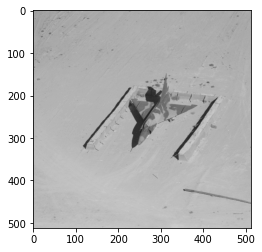

In [ ]:
I_m=plt.imread('7.1.02.tiff')   #reading the image with the name of the file/image uploaded
print(I_m)
plt.imshow(I_m,cmap='gray',vmin=0,vmax=255)

#print("File Size In Bytes:- "+str(len(image_file.fp.read())))


2-2)min and max pixel values and the iamge resolution

In [ ]:
import numpy as np 
minimum_pixel_val=np.amin(I_m)
print("minimum_pixel_val =",minimum_pixel_val)
maximum__pixel_val=np.amax(I)
print("maximum__pixel_val =",maximum__pixel_val )
for n in range(0,20):
  if ((2**n)>=maximum__pixel_val):
    print("no of bits required per pixel=",n)
    break
width=len(I_m)
height=len(I_m[:,0])
print("The resolution of the image:",str(width)+'x'+str(height))
print("The total no of pixels",height*width)

minimum_pixel_val = 3
maximum__pixel_val = 250
no of bits required per pixel= 8
The resolution of the image: 512x512
The total no of pixels 262144


2-3)original vs dowloaded image compression efficiency

In [ ]:
import numpy as np
original_size=height*width
downloaded_image_size=262278       #change to the size (in bytes) of the uploaded file 
efficiency=downloaded_image_size/original_size
print("original_size:",original_size,'B')
print("downloaded_image_size:",downloaded_image_size,'B')
print("efficiency:",efficiency)


original_size: 262144 B
downloaded_image_size: 262278 B
efficiency: 1.0005111694335938


2-4)Extracting bit plane

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

enter b bit plane: 5
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 0 0 ... 1 1 1]]


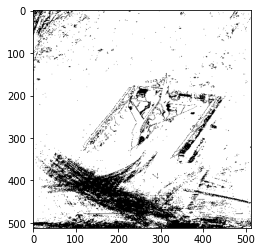

In [ ]:
Input_I=plt.imread('7.1.02.tiff')   #reading the image with the name of the file/image uploaded
b=int(input("enter b bit plane: ")) 
img=(Input_I>>b)%2
print(img)
plt.imshow(img,cmap='gray')
plt.show()

3-1)Histogram of an image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()
    



mode of the histogram : 177
max count of the pixels at mode: 30456


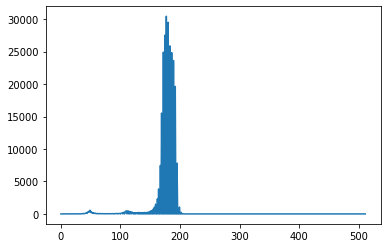

In [ ]:
Image=plt.imread('Airplane.tiff')
width=len(Image)
height=len(Image[:,0])
his=[0]*len(Image)
for i in range (width):
  for j in range (height):
    m=Image[i,j]
    his[m]=his[m]+1
plt.plot(his)
plt.show
mode=np.argmax(his)
count=np.amax(his)
print("mode of the histogram :",mode)
print("max count of the pixels at mode:",count)


By uploading the given gray scale image its modality is found:
Airplane.tiff_modality=1 mode at 177
Truck.tiff_modality= 1 mode at 127
Airport.tiff_modality=1 mode at 54
APC.tiff_modality=1 mode at 135

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


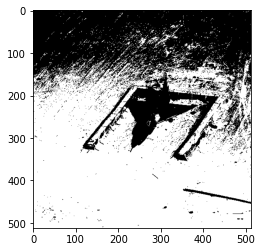

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img=np.array(Image)
T=mode
for i in range(width):
  for j in range(height):
    if (img[i,j]>=T):
      img[i,j]=1
    elif (img[i,j]<T):
      img[i,j]=0  
print(img)
imgplot=plt.imshow(img,cmap='gray')

3-a)Otu's algorithm

In [ ]:
import numpy as np
h=np.array(his)
V0=[0]*len(h)
V1=[0]*len(h)
intra_var=[0]*len(h)
for j in range(256):
  if (his[j]!=0):
    break
T=j
for i in range(0,256):
  Tr=i
  x,y=np.split(h,[i])
  P0=np.sum(x)/(height*width)
  V0[i]=np.var(x)
  P1=np.sum(y)/(height*width)
  V1[i]=np.var(y)
  intra_var[Tr]=P0*V0[i]+P1*V1[i]
count3=intra_var[T+1]
for i in range(T+2,256):
  if (intra_var[i]<count3):
    count3=intra_var[i]
    min_tr=i
print("optimum_threshold by otu's min intra class var algorithm:",min_tr)
 
  

optimum_threshold by otu's min intra class var algorithm: 176


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Binarizing using 3-a threshold

176
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


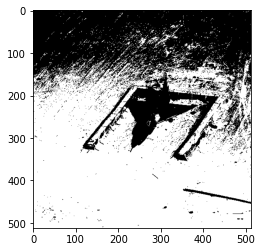

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img2=np.array(Image)
Tr=min_tr
print(Tr)
for i in range(width):
  for j in range(height):
    if (img2[i,j]>=Tr):
      img2[i,j]=1 
    elif (img2[i,j]<Tr):
      img2[i,j]=0  
print(img2)
imgplot=plt.imshow(img2,cmap='gray')

3-b)

In [ ]:
import numpy as np
inter_vr=[0]*len(his)
U=np.mean(Image)
P0=[0]*256
p=[0]*256
P1=[0]*256
U0=[0]*256
U1=[0]*256
for i in range(256):
  p[i]=his[i]/(width*height)
P0[0]=p[0]
U0[0]=0
for t in range(0,255):
  P0[t+1]=P0[t]+p[t+1]
  P1[t+1]=1-P0[t+1]
  if (P0[t+1]==0):
    U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])/(1+P0[t+1])
    U1[t+1]=(U)
  elif (P0[t+1]==1):
    U1[t+1]=(U-U0[t+1]*P0[t+1])/(1+1-P0[t+1])
    U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])
  else:
     U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])/(P0[t+1])
     U1[t+1]=(U-(U0[t+1]*P0[t+1]))/(1-P0[t+1])
  inter_vr[t+1]=P0[t+1]*P1[t+1]*((U0[t+1]-U1[t+1])**2)
c=np.nanargmax(inter_vr)
print("optimum_threshold by otu's max inter class var algorithm:",c)
  

optimum_threshold by otu's max inter class var algorithm: 132


Binarizing using 3-b threshold

132
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


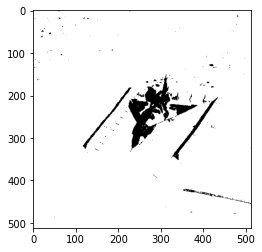

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
imgp=np.array(I)
Tr=c
print(Tr)
for i in range(width):
  for j in range(height):
    if (imgp[i,j]>=Tr):
      imgp[i,j]=1
    elif (imgp[i,j]<Tr):
      imgp[i,j]=0  
print(imgp)
imgplot=plt.imshow(imgp,cmap='gray')

3-4 and 3-5(if error 'AxesImage' object is not subscriptable occurs, run the previous code and then compute current code)

512 512
603
[251032, 4, 2, 8, 1, 2, 10, 1, 1, 5, 8, 2, 0, 1, 1, 2, 2, 4, 0, 1, 2, 1, 1, 1, 14, 0, 1, 0, 1, 16, 0, 1, 0, 1, 1, 1, 1, 7, 1, 2, 6, 3, 0, 3, 2, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 3, 36, 3, 3, 2, 3, 6, 3, 2, 1, 1, 4480, 3, 0, 0, 2, 1, 2, 0, 0, 0, 0, 4, 5, 1, 20, 11, 0, 0, 0, 1, 17, 1, 1, 0, 6, 16, 1, 9, 1, 2, 0, 0, 4, 45, 1, 0, 6, 7, 7, 5, 0, 0, 17, 1249, 4, 0, 0, 0, 879, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 28, 0, 0, 0, 0, 5, 0, 0, 0, 1, 20, 0, 0, 3, 76, 1, 0, 0, 0, 7, 0, 1, 0, 1, 8, 0, 2, 0, 0, 0, 24, 0, 0, 1, 0, 0, 28, 43, 5, 0, 0, 1, 0, 0, 0, 0, 0, 48, 0, 1, 0, 0, 1, 1, 12, 0, 3, 2, 10, 0, 25, 1, 0, 3, 0, 0, 1216, 2, 0, 18, 1, 0, 0, 0, 0, 0, 730, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 75, 2, 0, 0, 0, 7, 10, 0, 0, 0, 1, 7, 5, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 852, 0, 2, 22, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 16, 0, 0, 31, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 12, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 

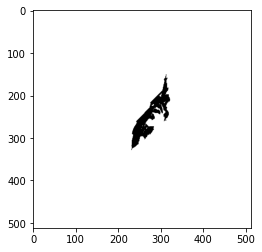

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
k=1
print(height,width)
img3=np.array(imgp)
R=np.zeros((height,width),int)
for i in range(1,height):
  for j in range(1,width):
    if ((imgp[i,j]==0) and ((imgp[i,j-1]==1) and (imgp[i-1,j]==1))):
      R[i,j]=k
      #print(R[i,j])
      k=k+1
    elif ((imgp[i,j]==0) and (imgp[i,j-1]==1) and (imgp[i-1,j]==0)):
      R[i,j]=R[i-1,j]
    elif ((imgp[i,j]==0) and (imgp[i,j-1]==0) and (imgp[i-1,j]==1)):
      R[i,j]=R[i,j-1]
    elif ((imgp[i,j]==0) and (imgp[i,j-1]==0) and (imgp[i-1,j]==0)):
      R[i,j]=min(R[i-1,j],R[i,j-1])
      R[i-1,j]=R[i,j]
      R[i,j-1]=R[i,j]
print(k)   #labels
#to remove minor blobs
b=[0]*height*width
for i in range(height):
  for j in range(width):
    m=R[i,j]
    b[m]=b[m]+1
print(b)
lb=0
for i in range(1,len(b)):
  if (b[i]>lb):
    lb=b[i]
    maxlabel=i
print("largest blob count:",lb)
print("largest blob at:",maxlabel)
for i in range(height):
  for j in range(width):
    if ((imgp[i,j]==0) and (R[i,j]!=maxlable)):
      img3[i,j]=1
print(img3)
imgp=plt.imshow(img3,cmap='gray')
plt.show()

